<a href="https://colab.research.google.com/github/rayasrujanareddy/ML-PCA/blob/main/PCA.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

##Lab Exercise 1: Understanding PCA with a Simple Dataset

In [32]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler

# Load the Iris dataset
data_path = '/content/iris.csv'
df = pd.read_csv(data_path)

# Dropping the label column for PCA (assuming last column is class labels)
features = df.iloc[:, :-1].values  # Extracting features
labels = df.iloc[:, -1].values     # Extracting class labels

In [33]:
# Standardizing the features
scaler = StandardScaler()
features_standardized = scaler.fit_transform(features)

In [34]:
# Compute the covariance matrix
cov_matrix = np.cov(features_standardized.T)

In [35]:
# Calculate eigenvalues and eigenvectors
eigenvalues, eigenvectors = np.linalg.eig(cov_matrix)

# Sort the eigenvectors by the magnitude of eigenvalues
sorted_index = np.argsort(eigenvalues)[::-1]
sorted_eigenvalues = eigenvalues[sorted_index]
sorted_eigenvectors = eigenvectors[:, sorted_index]

In [36]:
# PCA Transformation: Projecting onto the first 2 principal components
n_components = 2
eigenvector_subset = sorted_eigenvectors[:, 0:n_components]
features_pca = np.dot(features_standardized, eigenvector_subset)

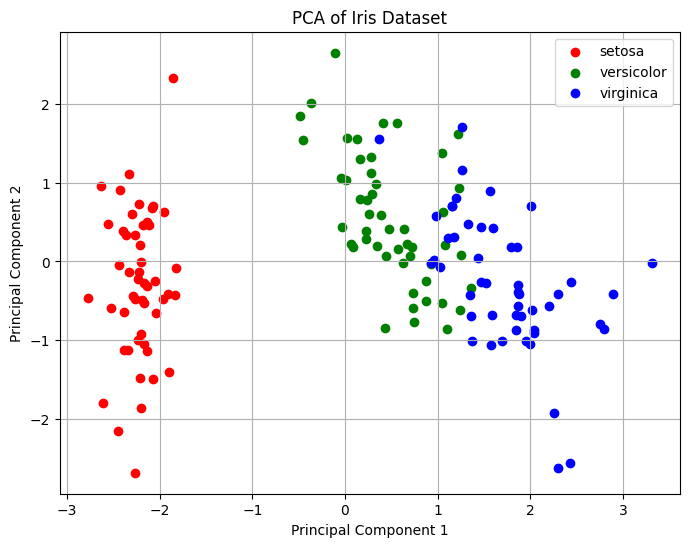

In [37]:
# Visualization: Scatter plot in 2D
plt.figure(figsize=(8, 6))

# Map class labels to colors
colors = {'Iris-setosa': 'r', 'Iris-versicolor': 'g', 'Iris-virginica': 'b'}
for label in np.unique(labels):
    subset = features_pca[labels == label]
    # Fix: Construct the key for the colors dictionary using f-string
    plt.scatter(subset[:, 0], subset[:, 1], label=label, color=colors[f'Iris-{label}'])

plt.title('PCA of Iris Dataset')
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
plt.legend()
plt.grid(True)
plt.show()

## Lab Exercise 2: PCA for Image Compression

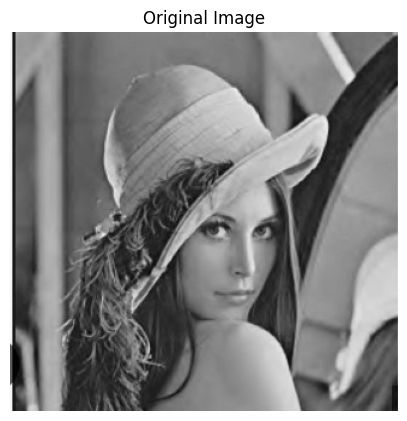

In [38]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.decomposition import PCA
from PIL import Image

# Load the image
image_path = '/content/image.jpg'
image = Image.open(image_path).convert('L')  # Convert image to grayscale
image = np.array(image)


# Display original image
plt.figure(figsize=(5, 5))
plt.imshow(image, cmap='gray')
plt.title("Original Image")
plt.axis('off')
plt.show()


In [39]:
# Reshape the image into a 2D matrix (flattening)
original_shape = image.shape
image_flattened = image.reshape(original_shape[0], -1)

In [40]:
# Apply PCA: Reduce to different numbers of principal components
def pca_image_compression(image_flat, n_components):
    pca = PCA(n_components=n_components)
    pca.fit(image_flat)
    transformed_image = pca.transform(image_flat)
    reconstructed_image = pca.inverse_transform(transformed_image)
    return reconstructed_image

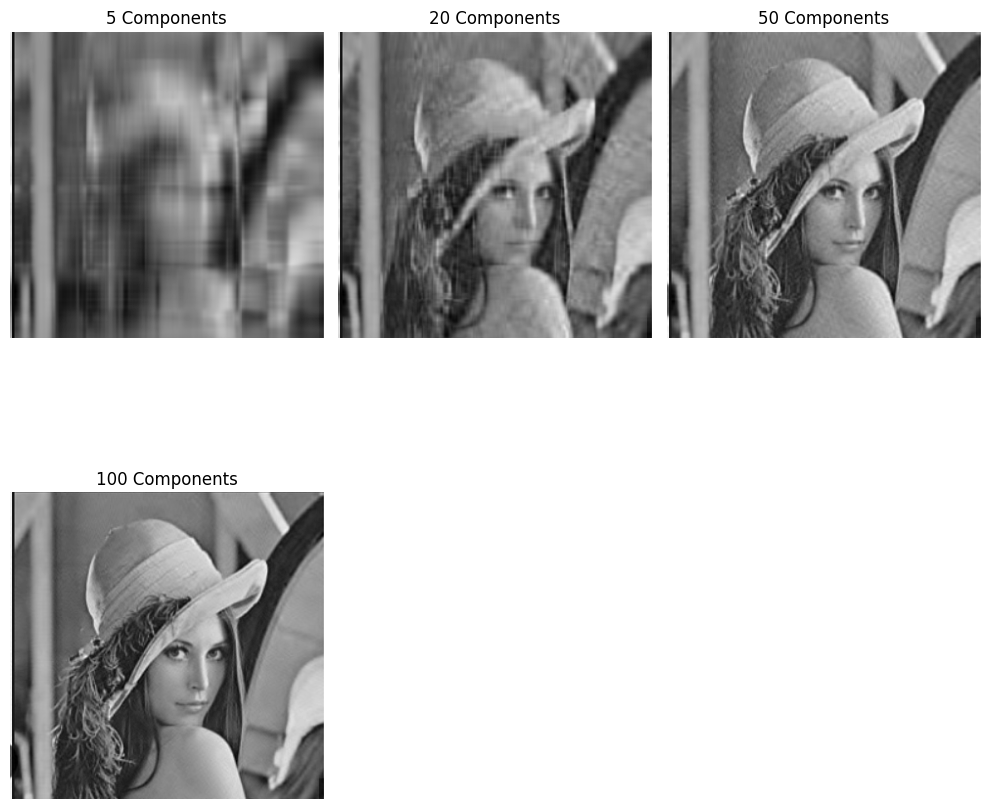

In [41]:
# Reconstruct images with different numbers of principal components
components = [5, 20, 50, 100]
plt.figure(figsize=(10,10))

for i, n_comp in enumerate(components):
    reconstructed = pca_image_compression(image_flattened, n_comp)
    reconstructed = reconstructed.reshape(original_shape)

    plt.subplot(2, 3, i+1)
    plt.imshow(reconstructed, cmap='gray')
    plt.title(f'{n_comp} Components')
    plt.axis('off')

plt.tight_layout()
plt.show()


## Lab Exercise 3: PCA for Feature Reduction in a Classification Task

In [42]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd  # Import pandas for DataFrame manipulation
from sklearn import datasets
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, precision_score, recall_score

# Load the Wine dataset
data_path = '/content/WineQT.csv'  # Change this to the correct path for the dataset
df = pd.read_csv(data_path)

In [43]:
# Assuming 'quality' is the target variable and the rest are features
X = df.drop('quality', axis=1)  # Features
y = df['quality']  # Target variable

# Split the data into training and testing sets (70% training, 30% testing)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42, stratify=y)

In [44]:
# Standardize the features
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Baseline Model (No PCA): Logistic Regression
baseline_model = LogisticRegression(max_iter=1000)
baseline_model.fit(X_train_scaled, y_train)

# Baseline Performance
y_pred_baseline = baseline_model.predict(X_test_scaled)
baseline_accuracy = accuracy_score(y_test, y_pred_baseline)
baseline_precision = precision_score(y_test, y_pred_baseline, average='weighted',zero_division=1)
baseline_recall = recall_score(y_test, y_pred_baseline, average='weighted')

print(f"Baseline (NO PCA): Accuracy: {baseline_accuracy:.4f},  Precision: {baseline_precision:.4f}, Recall: {baseline_recall:.4f}")


Baseline (NO PCA): Accuracy: 0.6210,  Precision: 0.6187, Recall: 0.6210


In [45]:
# Apply PCA and evaluate Logistic Regression model
def evaluate_pca(n_components, X_train_scaled, X_test_scaled, y_train, y_test):
    pca = PCA(n_components=n_components)
    X_train_pca = pca.fit_transform(X_train_scaled)
    X_test_pca = pca.transform(X_test_scaled)

    model = LogisticRegression(max_iter=1000)
    model.fit(X_train_pca, y_train)
    y_pred = model.predict(X_test_pca)

    accuracy = accuracy_score(y_test, y_pred)
    precision = precision_score(y_test, y_pred, average='weighted', zero_division=1)
    recall = recall_score(y_test, y_pred, average='weighted')

    return accuracy, precision, recall
# Components to evaluate
components = [2, 5, 10]
performance = {}

for n in components:
    acc, prec, rec = evaluate_pca(n, X_train_scaled, X_test_scaled, y_train, y_test)
    performance[n] = {'accuracy': acc, }
    print(f"PCA with {n} components - Accuracy: {acc:.4f},")

PCA with 2 components - Accuracy: 0.5364,
PCA with 5 components - Accuracy: 0.6064,
PCA with 10 components - Accuracy: 0.6210,


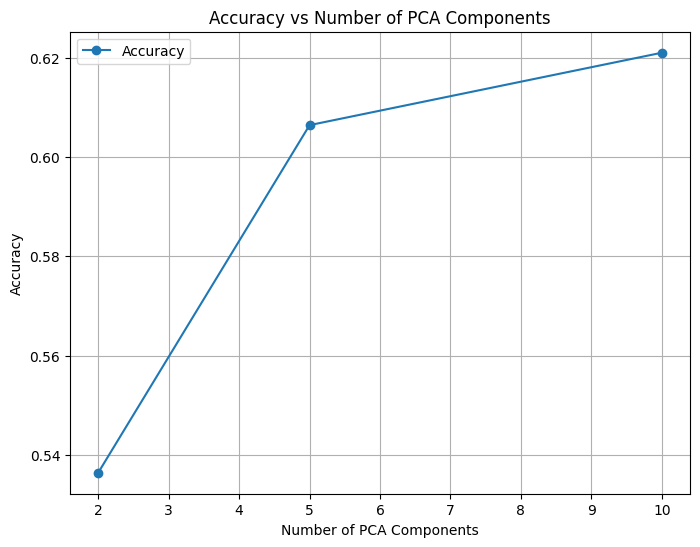

In [46]:
# Visualization: Accuracy vs Number of PCA Components
plt.figure(figsize=(8, 6))
plt.plot(components_list, accuracy_list, marker='o', label='Accuracy')
plt.title('Accuracy vs Number of PCA Components')
plt.xlabel('Number of PCA Components')
plt.ylabel('Accuracy')
plt.grid(True)
plt.legend()
plt.show()
